<br><br><br><br>

<CENTER><font size=12px, face = \"times new roman\">Machine Learning</font></CENTER>

<br><br><br><br>







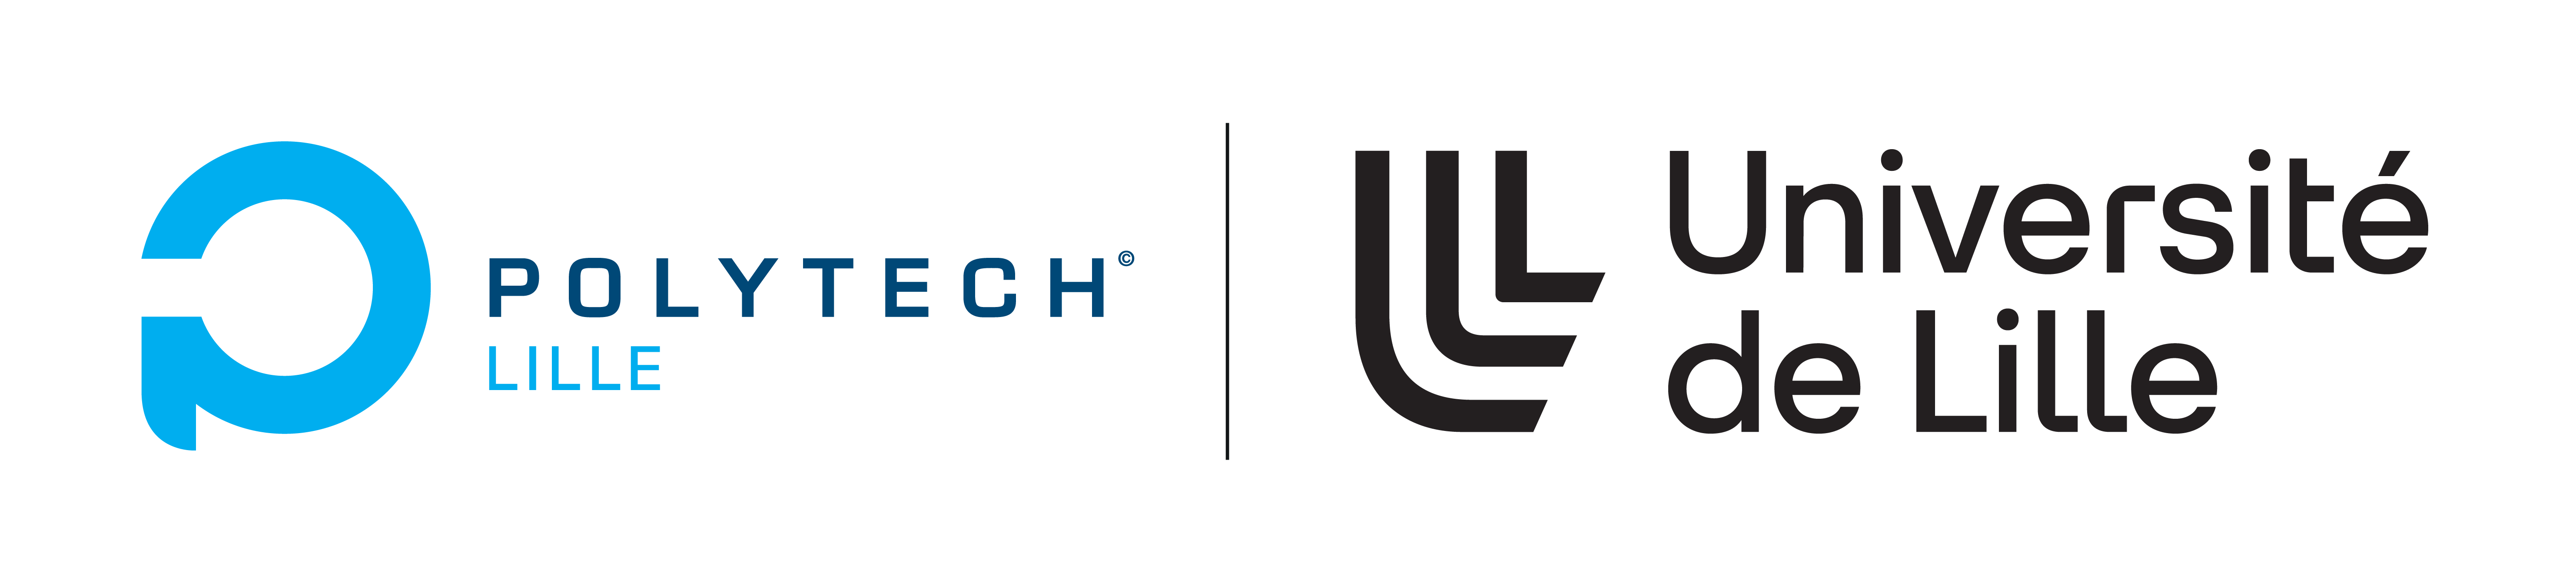

<br><br>

<p><CENTER>Elève:&emsp;MASSON KEVIN <br>Enseignants:&emsp;KESSACI&ensp;ROUSSEL</CENTER></p>

<div class=\"breakafter\"></div>

# TP Machine Learning

L'objectif est d'appréhender plusieurs techniques d'apprentissage supervisé et de se familiariser avec la bibliothèque python [Scikit-learn](https://scikit-learn.org/stable/index.html). Cette bibliothèque est destinée à l'apprentissage automatique. Ici, nous focaliserons notre étude sur des problèmes et donc des algorithmes/techniques de classification. 

Nous utiliserons pour la classification des :
* Arbres de décisions
* SVM
* Techniques de bagging et random forest
* Techniques de boosting (ADABoost et XGBoost)

différents jeux de données :
* iris
* digits
* breast-cancer

et nous nous intéresserons aux techniques de répartition _train/test_, à la normalisation des données et au paramétrage automatique.


## Séance 1

Pour cette séance, nous allons découvrir scikit-learn et nous allons tester plusieurs méthodologies pour normaliser les données

### Chargement des jeux de données

Scikit-learn embarque plusieurs jeux de données "jouets" qui permettent de découvrir toutes les fonctionnalités de la bibliothèque. Il suffira donc d'importer le jeu de données _jeuXXX_ avec la commande ```from sklearn.datasets import load_jeuXXX``` puis de le charger dans une variable ```jXXX``` avec la commande ```jXXX = load_jeuXXX()```

Dans la suite nous considérerons que les données sont rangées dans l'objet X et que la classe associée à chaque observation de X sont dans y. Les méthodes ```data``` et ```target``` permet d'accéder aux informations pour instancier X et y réciproquement : ```X, y = jXXX.data, jXXX.target```.

La description du jeu de données est accessible via la méthode ```DESCR``` et peut être afficher via un simple ```print(jXXX.DESCR```).

Il est possible d'importer les jeux de données directement sous un format dataframe Panda en ajoutant l'option en paramètre  ```as_frame= True``` dans la commande de chargement et d'utiliser la méthode ```frame``` pour y accéder. ```jXXX.frame``` correspond donc au dataframe du jeu de donnée et peut être affiché via un print.





**§ Taper les commandes pour importer et charger les jeux de données iris, digits et breast_cancer**

**§ Donner pour chacun des jeux de données : une description brève, le nombre d'observations, le nombre de features, le nombre de classes et la répartition pour chacune d'elles**

Vous pouvez utiliser le code suivant pour afficher les 10 premières images du jeu de données digits :

``` 
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show() ```

**Importation des packages nécessaires**

In [185]:
from sklearn.datasets import load_iris,load_digits,load_breast_cancer
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importation des données**

In [186]:
myiris, mydigits, mybreast_cancer = load_iris(as_frame= True), load_digits(), load_breast_cancer(as_frame= True)

**Table Digits**

*Affichage des 10 premières images*

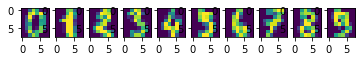

In [187]:
fig = plt.figure()
for i, digit in enumerate(mydigits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

Dimension du jeu de données:

In [188]:
mydigits.data.shape

(1797, 64)

In [189]:
mydigits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

Le nombre d'attributs est 64

Le nombre de classes est 10, chacune correspondant à un chiffre

**Table Iris**

*Affichage des 10 premières lignes*

In [190]:
myiris.frame.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


*Description de la table Iris*

La table iris est composée de 4 attributs:
<ul>
<li>sepal length</li>
<li>sepal width</li>
<li>petal length</li>
<li>petal width</li>
</ul>

Elle contient aussi une colonne target composée de 3 classes d'iris : 

In [191]:
list(myiris.target_names)

['setosa', 'versicolor', 'virginica']

Dimension du jeu de données:

In [192]:
np.shape(myiris.frame)

(150, 5)

L'objectif de cette table est de déterminé à partir d'un modèle statistique l'appartenance d'une iris à l'une des 3 classes suivant les valeurs de ses attributs. La colonne Target permet d'entrainer notre modèle.

**Table breast_cancer**

*Affichage des 10 premières lignes*

In [193]:
mybreast_cancer.frame.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


*Description de la table Breast_cancer*

La table Breast_cancer est composée de 30 attributs:

Elle contient aussi une colonne target composée de 2 classes : 

In [194]:
list(mybreast_cancer.target_names)

['malignant', 'benign']

Dimension du jeu de données:

In [195]:
np.shape(mybreast_cancer.frame)

(569, 31)

L'objectif de cette table est de déterminé à partir d'un modèle statistique si une personne est à risque ou non suivant la valeurs de ses différents attributs. La colonne Target permet d'entrainer notre modèle.

### Normalisation du jeu de données

Prenons le jeu **breast-cancer**. 
Les 30 features sont de dimensions très différentes (voir les valeurs min et max de chacunes) 
ce qui peut entrainer pour certaines méthodes de classification une performance diminuée.


Considérons ici la méthode SVM accessible via l'import  ```from sklearn.svm import SVC``` qui est le module SVM adapté à la prédiction de classe.
A partir des objets X et y présentés ci-dessus, créons les ensembles nécessaires de _train_ et de _test_ :

``` X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=s) ``` où s est un entier que vous pouvez choisir. Il est nécessaire d'importer ce module via la commande ```from sklearn.model_selection import .train_test_split```.

Instancions un svm, puis entrainons le en utilisant les ensembles X_train et y_train afin de prédire la classe des observations de X_test et de comparer leur accuracy (importer le module accuracy_score avec la commande ```from sklearn.metrics import accuracy_score```). Le code suivant implémente cette méthodologie :

``` 
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy: %.2f%%" % (accuracy_score(y_test,y_pred) * 100.0))
```

**§ Quelle valeur d'accuracy obtenez-vous ?**

Intéressons nous maintenant à la normalisation des données, une étape importante du pré-processing. 
Nous allons donc modifier les données de l'objet X afin d'obtenir des données entre 0 et 1 pour chaque feature en utilisant le module MinMaxScaler accessible via l'import ```from sklearn.preprocessing import MinMaxScaler``` et l'instanciation de l'objet scaler : ``` scaler = MinMaxScaler() ```

Une première solution est donnée dans le code suivant :

```
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=s)

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred) )
```

Une deuxième solution est donnée dans le code suivant :

```
X_train_scaled = scaler.fit_transform(X_train)

svm.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

y_pred = svm.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred) )
```

**§ Analyser et expliquer en quoi l'approche de normalisation est différente entre ces deux solutions**

**§ Comparer l'accuracy de ces 3 modèles pour des valeurs de s allant de 1 à 30**

**§ Que remarquez-vous ? Conclure**


**Importation des packages nécessaires**

In [196]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
X = mybreast_cancer.frame.iloc[:,1:30]
y = mybreast_cancer.frame.iloc[:,30]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [197]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy: %.2f%%" % (accuracy_score(y_test,y_pred) * 100.0))

Accuracy: 93.09%


La valeur d'Accuracy avec ces données est de 93.09%

In [198]:
scaler = MinMaxScaler()

<h4>Première solution<h4>

In [199]:
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=10)

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred)*100 )

98.93617021276596


La normalisation est effectuée sur le jeu de données avant séparation en échantillons test et train.

<h4>Deuxième solution<h4>

In [200]:
X_train_scaled = scaler.fit_transform(X_train)

svm.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

y_pred = svm.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred)*100)

98.40425531914893


La normalisation est effectuée sur le jeu de données de test uniquement.

<h4>Comparaison des 3 accuracy avec s variant de 1 à 30<h4>

<AxesSubplot:>

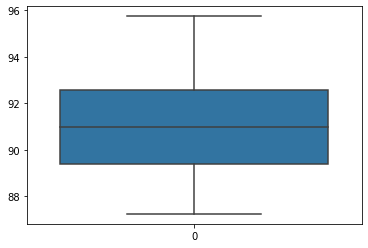

In [201]:
L1=[]
for s in range(30):
    X = mybreast_cancer.frame.iloc[:,1:30]
    y = mybreast_cancer.frame.iloc[:,30]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=s)
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    L1.append(accuracy_score(y_test,y_pred) * 100.0)
sns.boxplot(L1)

<AxesSubplot:>

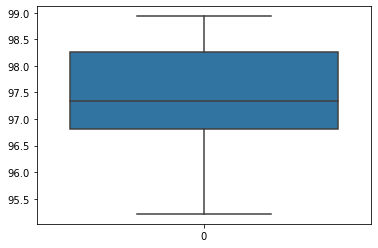

In [202]:
L2=[]
for s in range(30):
    X_scaled = scaler.fit_transform(X)
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=s)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    L2.append(accuracy_score(y_test,y_pred) * 100.0)
sns.boxplot(L2)

<AxesSubplot:>

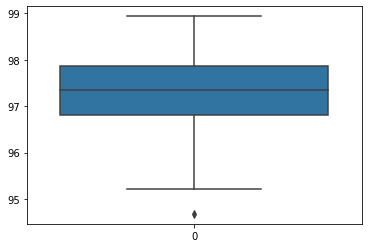

In [203]:
L3=[]
for s in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=s)
    X_train_scaled = scaler.fit_transform(X_train)
    svm.fit(X_train_scaled, y_train)
    X_test_scaled = scaler.transform(X_test)
    y_pred = svm.predict(X_test_scaled)
    L3.append(accuracy_score(y_test,y_pred) * 100.0)
sns.boxplot(L3)

**Conclusion**

In [204]:
L = [L1,L2,L3]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6f25cded90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6f25c6d490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6f25cdea90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f6f25c6db50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6f25c6deb0>,
 'means': []}

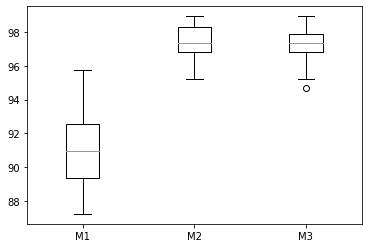

In [205]:
from matplotlib.pyplot import boxplot
data = pd.DataFrame({
    'M1' : L1,
    'M2' : L2,
    'M3' : L3,
})

boxplot(np.array(data), labels = list(data))

Les boxplots montrent une performance plus importante avec normalisation des données (Méthode 1 et 2 ont des médiannes d'accuracy et des min et max plus élevées).
En ce qui concerne les 2 méthodes de normalisation, la méthode 1 peut sembler plus performante avec une médianne plus élevée. Cependant en normalisant avant la séparation des données on risque d'effectuer un sur-apprentissage des données.
Ainsi, d'après cet exercice, il est donc conseillé de normaliser le jeu de données après séparation des données.
